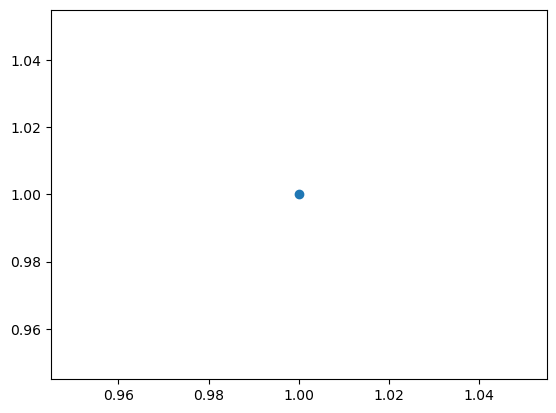

In [1]:
import matplotlib.pyplot as plt
plt.scatter(1,1)

In [2]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import numpy as np

In [3]:
main_dir = 'Seg_dataset'
train_dir = 'train'
test_dir = 'test'

In [4]:
train_transforms = transforms.Compose([transforms.Resize((160, 240)),
                                       transforms.ToTensor()
                                      ])
test_transforms = train_transforms

train_data_images = datasets.ImageFolder(os.path.join(main_dir, train_dir,'train_images'), transform=train_transforms)
train_data_masks = datasets.ImageFolder(os.path.join(main_dir, train_dir,'train_masks'), transform=train_transforms)
TRAIN_DATA = [[train_data_images[i],
               train_data_masks[i]] for i in range(len(train_data_images))]

test_data_images = datasets.ImageFolder(os.path.join(main_dir, test_dir,'test_images'), transform=test_transforms)
test_data_masks = datasets.ImageFolder(os.path.join(main_dir, test_dir,'test_masks'), transform=test_transforms)
TEST_DATA = [[test_data_images[i],
               test_data_masks[i]] for i in range(len(test_data_images))]

In [5]:
# class Model(nn.Module):
#     def __init__(self):
#         super().__init__()

#         self.pool = nn.MaxPool2d(2, 2)
#         self.sample = nn.Upsample(scale_factor=2, mode='nearest')
        
#         self.bn_3 = nn.BatchNorm2d(3)
#         self.bn_64 = nn.BatchNorm2d(64)
        
           
#         self.conv1 = nn.Conv2d(3, 3, kernel_size=5, stride=1, padding=2)
        
#         self.conv2 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2)
#         self.conv3 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
#         self.conv4 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
#         self.conv5 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
#         self.conv6 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)

#         self.conv7 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
#         self.conv8 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
#         self.conv9 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
#         self.conv10 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
#         self.conv11 = nn.Conv2d(64, 3, kernel_size=5, stride=1, padding=2)
        
#         self.conv12 = nn.Conv2d(3, 3, kernel_size=11, stride=1, padding=5)    
    
#     def forward(self, X):
        
#         X = self.conv1(X)
#         X = self.bn_3(X)
#         X = F.relu(X)
              
#         X = self.conv2(X)
#         X = self.bn_64(X)
#         X = F.relu(X)
        
#         SKIP2 = X
#         X = self.pool(X)

#         X = self.conv3(X)
#         X = self.bn_64(X)
#         X = F.relu(X)

      
#         X = self.conv4(X)
#         X = self.bn_64(X)
#         X = F.relu(X)
        
#         SKIP4 = X 
#         X = self.pool(X)
        
              
#         X = self.conv5(X)
#         X = self.bn_64(X)
#         X = F.relu(X)
        
#         SKIP5 = X
#         X 

#         X = self.conv6(X)
#         X = self.bn_64(X)
#         X = F.relu(X)

#         X = self.sample(X)
#         X = self.conv7(X)
#         X = self.bn_64(X)
#         X = F.relu(X)

#         X = X + SKIP5

#         X = self.sample(X)
#         X = self.conv8(X)
#         X = self.bn_64(X)
#         X = F.relu(X)

#         X = X + SKIP4

#         X = self.sample(X)
#         X = self.conv9(X)
#         X = self.bn_64(X)
#         X = F.relu(X)


#         X = self.conv10(X)
#         X = self.bn_64(X)
#         X = F.relu(X)

#         X = X + SKIP2


#         X = self.conv11(X)
#         X = self.bn_3(X)
#         X = F.relu(X)


#         X = self.conv12(X)
#         X = F.relu(X)
        
#         return X

In [11]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.pool = nn.MaxPool2d(2, 2)
        self.pool_5 = nn.MaxPool2d(5, 5)
        self.sample = nn.Upsample(scale_factor=2, mode='nearest')
        self.sample_5 = nn.Upsample(scale_factor=5, mode='nearest')
        
        self.bn_64 = nn.BatchNorm2d(64)
        self.bn_3 = nn.BatchNorm2d(3)

        
        self.conv_input = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        
        self.conv1 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)

        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
        
        self.conv5 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
        self.conv6 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
        
        self.conv7 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
        self.conv8 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)

        self.conv10 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.conv_bottleneck = nn.Conv2d(64, 64, kernel_size=1, stride=1, padding=0)

        self.conv11 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.conv12 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
        
        self.conv13 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)

        self.conv14 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2)
         
        self.conv_output = nn.Conv2d(64, 3, kernel_size=5, stride=1, padding=2) 
        
    def forward(self, X):
        
        X = self.conv_input(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.conv1(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.conv2(X)
        X = self.bn_64(X)
        X = F.relu(X)
        
        SKIP1 = X 
        X = self.pool(X)

        X = self.conv3(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.conv4(X)
        X = self.bn_64(X)
        X = F.relu(X)

        SKIP2 = X 
        X = self.pool(X)

        X = self.conv5(X)
        X = self.bn_64(X)
        X = F.relu(X)
        
        X = self.conv6(X)
        X = self.bn_64(X)
        X = F.relu(X)

        SKIP3 = X 
        X = self.pool(X)

        X = self.conv7(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.conv8(X)
        X = self.bn_64(X)
        X = F.relu(X)

        SKIP4 = X 
        X = self.pool_5(X)

        X = self.conv10(X)
        X = self.bn_64(X)
        X = F.relu(X)

        SKIP5 = X 
        X = self.pool(X)

        X = self.conv_bottleneck(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.sample(X)
        X = X + SKIP5

        X = self.conv11(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.sample_5(X)
        X = X + SKIP4

        X = self.conv12(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.sample(X)
        X = X + SKIP3

        X = self.conv13(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.sample(X)
        X = X + SKIP2

        X = self.conv14(X)
        X = self.bn_64(X)
        X = F.relu(X)

        X = self.sample(X)
        X = X + SKIP1

        X = self.conv_output(X)
        X = self.bn_3(X)
        X = F.relu(X)
        return X

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Model().to(device)
NAME = 'FCNs_1_test'
epoche = 0
test_acc = None
best = 0
BEST_NET = None

In [13]:
epochs = 1000
learning_rate = 0.00005

criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), learning_rate, weight_decay=0.00001)

BATCH_SIZE = 16#len(test_data)
           
train_loader = torch.utils.data.DataLoader(TRAIN_DATA, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(TEST_DATA, batch_size=BATCH_SIZE, shuffle=False)

In [21]:
for cur in range(epochs):
    epoche += 1
    obj_number = 0  
    difference = 999
    for x, y in train_loader:
            
        inputs, labels = x[0].to(device), y[0].to(device) * 255 
        optimizer.zero_grad()
        outputs = model(inputs)
         

        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        print(f"Эпоха: {epoche} , ошибка  {loss}        ",
              sep='', end='\r')
    

    test_total = 0
    test_correct = 0    
    with torch.no_grad():
            for x_test, y_test in test_loader:
    
                images, targets = x_test[0].to(device), y_test[0].to(device)
                test_outputs = model(images)
                difference = criterion(test_outputs, targets)


KeyboardInterrupt: 

In [10]:
np.shape(outputs)

torch.Size([16, 3, 162, 242])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


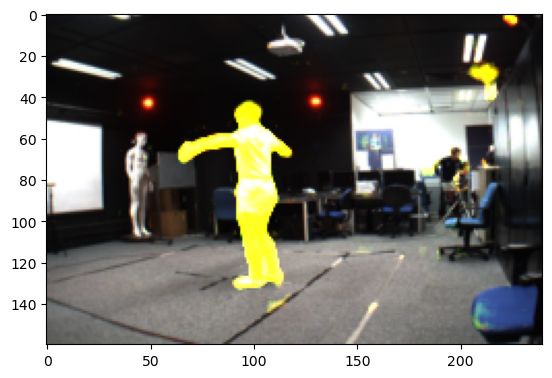

In [51]:
N = np.random.randint(len(test_data_images))
image_input = np.array(test_data_images[N][0])
image_input = image_input.transpose((1, 2, 0))

image_mask = model(test_data_images[N][0].unsqueeze(0).to(device)).cpu().detach().numpy()
image_mask = image_mask[0].transpose((1, 2, 0))
plt.imshow(image_input + image_mask * [1,1,0])

In [101]:
torch.save(model, NAME)
#model = torch.load(NAME, weights_only= 0)

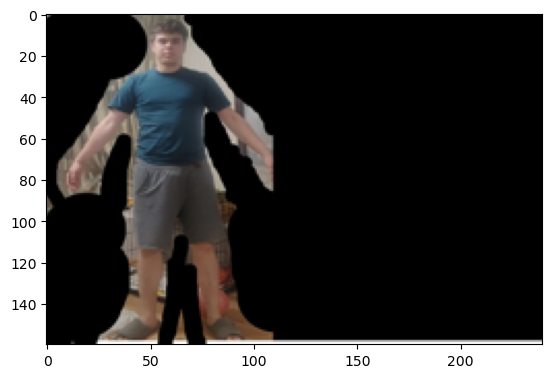

In [99]:
from PIL import Image
image_path = "my_photo.jpg"
image = Image.open(image_path)
image = image.resize((240,160))
plt.imshow(image)

trans = transforms.Compose([transforms.PILToTensor()])

mout = model((transform(image)/255).unsqueeze(0).to(device))
mout = mout.cpu().detach().numpy()
mout = mout[0]
mout = mout.transpose((1, 2, 0))

plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


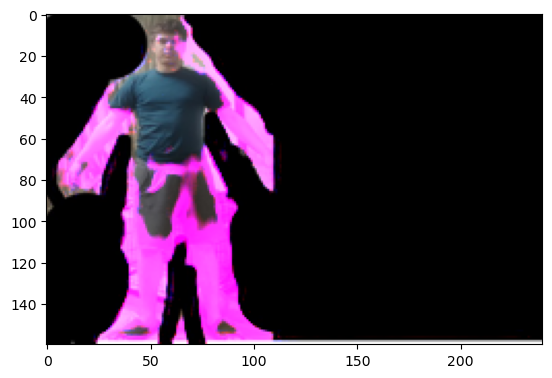

In [100]:
plt.imshow(np.array(image)/255 + mout * [1,0,1])

TypeError: 'Image' object is not subscriptable